### Visualizing the distribution of the observations

### Load the required libraries

In [4]:
# sc.stop()

In [5]:
import pandas as pd
import numpy as np
import sklearn as sk
import urllib
import math
%pylab inline

import findspark
findspark.init()

from pyspark import SparkContext
#sc.stop()
sc = SparkContext(master="local[3]",pyFiles=['lib/numpy_pack.py','lib/spark_PCA.py','lib/computeStats.py'])

from pyspark import SparkContext
from pyspark.sql import *
sqlContext = SQLContext(sc)

import sys
sys.path.append('./lib')

import numpy as np
from numpy_pack import packArray,unpackArray
from spark_PCA import computeCov
from computeStats import computeOverAllDist, STAT_Descriptions

### Read the data frame from pickle file

data_dir='../../Data/Weather'
file_index= 'SSSBBBBB'

from pickle import load

#read statistics
filename=data_dir+'/STAT_%s.pickle'%file_index
STAT,STAT_Descriptions = load(open(filename,'rb'))
print 'keys from STAT=',STAT.keys()

#read data
filename=data_dir+'/US_Weather_%s.parquet'%file_index

df=sqlContext.read.parquet(filename)
print df.count()
df.show(10)

Populating the interactive namespace from numpy and matplotlib
keys from STAT= ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']
12886
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|elevation|latitude|longitude|measurement|    station|undefs|              vector|  year|   label|
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|   3126.0| 39.3333|-106.3333|       TMAX|USC00058212|     4|[00 CF 00 D3 80 D...|1952.0|SSSBBBBB|
|   3126.0| 39.3333|-106.3333|       TMIN|USC00058212|    13|[A0 DB 00 7E 28 D...|1952.0|SSSBBBBB|
|   3126.0| 39.3333|-106.3333|       TOBS|USC00058212|     2|[40 D6 28 D8 E0 D...|1952.0|SSSBBBBB|
|   3340.6| 39.5667|   -105.8|       TMAX|USS0005K26S|     8|[20 D0 E0 D5 00 7...|1999.0|SSSBBBBB|
|   3340.6| 39.5667|   -105.8|       TMAX|USS0005K26S|     3|[00 46 00 D3 00 7...|2000.0|SSSBBBBB|
|   3340.6| 39.5667|   -105.8|       TMAX|USS0005K26S|     1|[00 C6 00 C6 

### Select data for a particular station and measurement type

In [6]:
### Function to extract the values 
measures = ['TOBS', 'TMIN', 'TMAX', 'PRCP', 'SNOW', 'SNWD']
data = []
for i in measures:
    sqlContext.registerDataFrameAsTable(df,'weather')
    Query="SELECT station, vector FROM weather\n\tWHERE measurement='%s'"%(i)
    df1 = sqlContext.sql(Query)
    rows=df1.rdd.map(lambda row:[unpackArray(row['vector'],np.float16), row['station']]).collect()
    measure = pd.DataFrame(rows, columns=('vector', 'station'))
    data.append(measure)

In [7]:
for i in range(0,3):
    data[i]['Jan_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[:31])/10)
    data[i]['Feb_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[31:59])/10)
    data[i]['Mar_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[59:90])/10)
    data[i]['Apr_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[90:120])/10)
    data[i]['May_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[120:151])/10)
    data[i]['Jun_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[151:181])/10)
    data[i]['Jul_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[181:212])/10)
    data[i]['Aug_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[212:243])/10)
    data[i]['Sep_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[243:273])/10)
    data[i]['Oct_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[273:304])/10)
    data[i]['Nov_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[304:334])/10)
    data[i]['Dec_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[334:])/10)
    data[i] = data[i].groupby('station').mean()
for i in range(3,6):
    data[i]['Jan_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[:31]))
    data[i]['Feb_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[31:59]))
    data[i]['Mar_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[59:90]))
    data[i]['Apr_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[90:120]))
    data[i]['May_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[120:151]))
    data[i]['Jun_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[151:181]))
    data[i]['Jul_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[181:212]))
    data[i]['Aug_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[212:243]))
    data[i]['Sep_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[243:273]))
    data[i]['Oct_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[273:304]))
    data[i]['Nov_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[304:334]))
    data[i]['Dec_%s' %measures[i]] = data[i]['vector'].apply(lambda x: np.nanmean(x[334:]))
    data[i] = data[i].groupby('station').mean()

/Users/Garrett/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/Users/Garrett/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/Users/Garrett/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice
/Users/Garrett/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: Mean of empty slice
/Users/Garrett/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: Mean of empty slice
/Users/Garrett/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/Users/Garrett/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: Mean of empty slice
/Users/Garrett/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: Mean of empty slice
/Users/Garrett/anac

In [8]:
print data[0].shape, data[1].shape, data[2].shape, data[3].shape, data[4].shape, data[5].shape

(67, 12) (88, 12) (88, 12) (205, 12) (159, 12) (100, 12)


In [9]:
data = pd.concat([data[0], data[1], data[2], data[3], data[4], data[5]], axis=1, join='inner')
print data.shape
data.head()

(42, 72)


,Jan_TOBS,Feb_TOBS,Mar_TOBS,Apr_TOBS,May_TOBS,Jun_TOBS,Jul_TOBS,Aug_TOBS,Sep_TOBS,Oct_TOBS,...,Mar_SNWD,Apr_SNWD,May_SNWD,Jun_SNWD,Jul_SNWD,Aug_SNWD,Sep_SNWD,Oct_SNWD,Nov_SNWD,Dec_SNWD
station,,,,,,,,,,,,,,,,,,,,,
USC00050214,-3.067460,0.943169,6.265914,12.471412,18.034434,23.461343,26.203302,23.622685,18.399074,11.059722,...,24.387715,0.863688,0.000000,0.000000,0.000000,0.0,0.050664,0.704160,9.818838,67.533984
USC00050370,-5.915557,-3.882990,-0.225186,5.645629,11.458220,16.668682,18.990489,18.043614,13.953533,7.565659,...,460.905571,67.408580,1.068699,0.182617,0.000000,0.0,1.029042,7.120245,74.301121,281.296196
USC00050372,-8.549479,-7.013306,-3.112526,0.783135,6.552823,11.054435,12.910685,11.238105,6.522500,1.171564,...,663.440000,272.408954,26.905912,0.620399,0.000000,0.0,0.966421,22.212402,141.220000,355.516827
USC00050454,-4.071766,-3.008384,0.330763,4.369357,9.617142,15.283640,17.323621,15.440165,10.908157,4.839002,...,171.282324,70.572933,7.487924,0.082115,0.040134,0.0,1.405095,16.216463,79.330412,165.537872
USC00050514,-1.711094,1.755938,5.659063,10.456250,16.892500,21.940000,26.585000,25.482500,19.812500,12.877500,...,18.782031,0.846875,0.161328,0.000000,0.000000,0.0,0.340039,5.083984,13.126563,124.137500


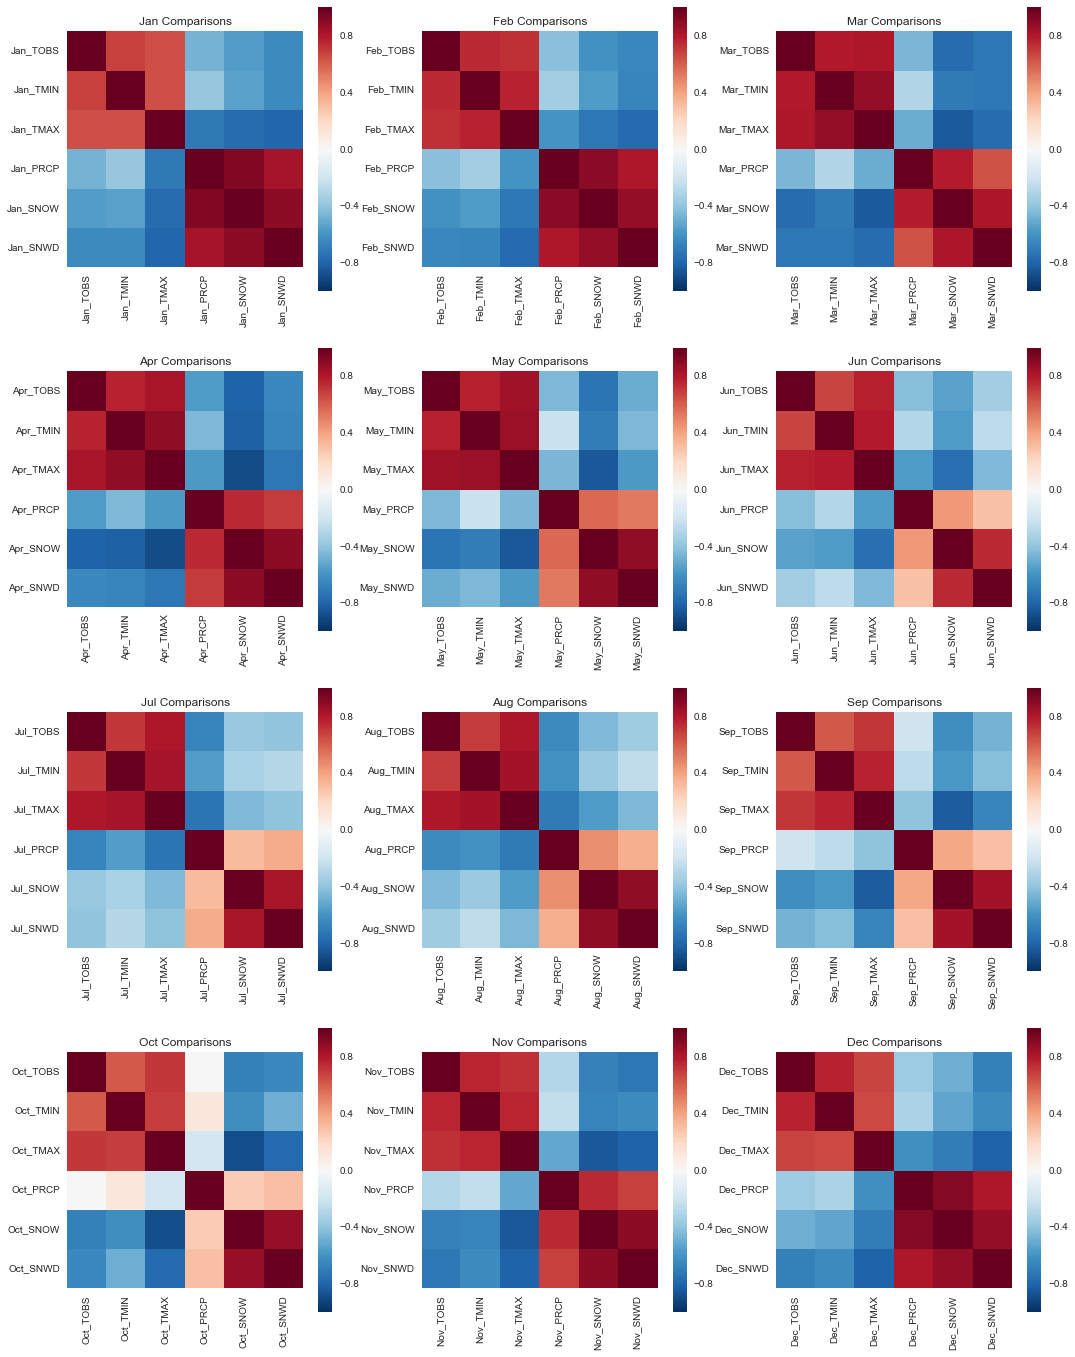

In [13]:
import seaborn as sns

num_plots = 12
fig, axes = plt.subplots(4,3,figsize=(18,24))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(len(months)):
    a = data.filter(regex=months[i])
#     mat = a.cov() # to get a heatmap of the covariance matrix
    mat = a.corr() # to get a heatmap of the correlation matrix
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    sns.heatmap(mat, vmax=1, square = True, ax=ax_curr)
    ax_curr.set_title('%s Comparisons' %months[i])
plt.savefig('g_figures/corr_matrix.png')